In [34]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from statistics import mean
import matplotlib.pyplot as plt  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [35]:
data=pd.read_csv("cardata.csv")
#print(data)
eine={'Dealer':0,'Individual':1}                               #using dictionaries changing the male and female values
data.Seller_Type=[eine[item] for item in data.Seller_Type]

zwei={'Petrol':0,'Diesel':1,'CNG':2}               #using dictionaries changing the male and female values
data.Fuel_Type=[zwei[item] for item in data.Fuel_Type]

trei={'Manual':0,'Automatic':1}                               #using dictionaries changing the male and female values
data.Transmission=[trei[item] for item in data.Transmission]
data.drop(["Car_Name"], axis = 1, inplace = True)
nd = (data - data.mean()) / data.std()
y1=nd['Selling_Price']
y = np.asarray(y1)

y=y.reshape(-1,1)
nd.drop(["Selling_Price"], axis = 1, inplace = True)


x = np.asarray(nd)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [36]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

y_pred=np.zeros((61,1))
y_pred = regressor.predict(x_test)
#print(y_test, y_pred)

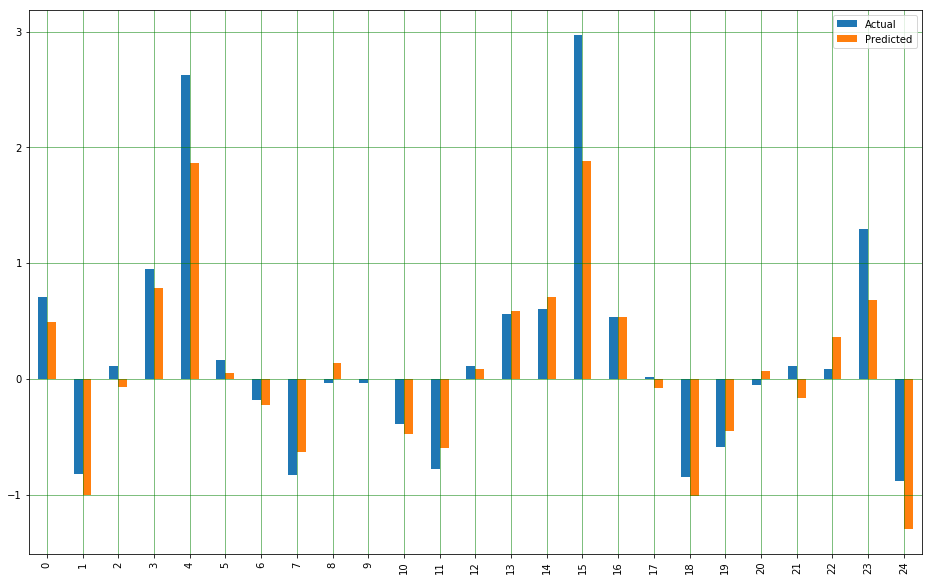

The mean square error is:
[0.04235647]


In [37]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

mse=0.0
for i in range (61):
    mse=mse+((y_pred[i]-y_test[i])**2)
mse=mse/(2.0*61.0)
print("The mean square error is:")
print(mse)